# This is a sample jupyter notebook to generate the prediction for competition submission
- For detail documentation, please visit https://rocket-capital-investment.gitbook.io/rci-tournament/


Download and import custom module from RCI repo to get latest dataset from IPFS


In [ ]:
# download custom module from RCI github repo which enable us to download dataset directly from IPFS
!wget -O dataloader.py https://raw.githubusercontent.com/rocketcapital-ai/competition_quickstart_dataloader/main/dataloader.py

# import modules
import sys, zipfile
from google.colab import files

# append the directory of downloaded custom module to system path so we can import it
sys.path.append('/content/')

# install base58 module to decrpt the dataset
!pip install base58

# import the downloaded module
from dataloader import download_dataset

# fill in your IPFS gateway url here
my_gateway = 'https://gateway.pinata.cloud' 

# download and unzip latest dataset from IPFS
filename = download_dataset(my_gateway)

3.9.4


## Loading train, test, validation data

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

train_dataset  = pd.read_csv('/content/dataset/train_dataset.csv', index_col = 'date')
validation_dataset  = pd.read_csv('/content/dataset/validation_dataset.csv', index_col = 'date')


In [ ]:
# first column (symbol) is the ticker
# 'target_updown' is the log of return for delta between current close to previous close
# 'target_neutral' is the rank by Era using 'target_updown'
# the rest of the columns are features to be used for ML
train_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1133,feature_1134,feature_1135,feature_1136,feature_1137,feature_1138,feature_1139,feature_DC1,target_neutral,target_updown
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,BTC,0.025641,0.000000,0.000000,0.923077,0.000000,0.897436,0.051282,0.000000,0.000000,...,0.641026,0.589744,0.589744,0.666667,0.820513,0.820513,0.871795,0.410256,0.743590,0.024718
2018-04-29,PRE,0.333333,0.076923,0.025641,0.025641,0.641026,0.487179,0.153846,0.179487,0.051282,...,0.820513,0.641026,0.564103,0.692308,0.743590,0.717949,0.820513,0.358974,0.487179,-0.022062
2018-04-29,QSP,0.589744,0.589744,0.512821,0.564103,0.512821,0.410256,0.461538,0.230769,0.179487,...,0.102564,0.051282,0.051282,0.102564,0.153846,0.153846,0.153846,0.384615,0.948718,0.198369
2018-04-29,ADA,0.846154,0.717949,0.743590,0.743590,0.102564,0.641026,0.717949,0.743590,0.256410,...,0.435897,0.615385,0.666667,0.487179,0.410256,0.512821,0.282051,0.871795,0.410256,-0.042060
2018-04-29,TRAC,0.384615,0.358974,0.410256,0.384615,0.564103,0.256410,0.307692,0.384615,0.512821,...,0.692308,0.794872,0.846154,0.717949,0.846154,0.897436,0.743590,0.333333,0.820513,0.108134


In [ ]:
# validation_dataset is the latest data from most recent Era
# it has the same structure as the dataset, however 'target_updown' and 'target_neutral' are NaN
validation_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1133,feature_1134,feature_1135,feature_1136,feature_1137,feature_1138,feature_1139,feature_DC1,target_neutral,target_updown
date,,,,,,,,,,,,,,,,,,,,,
2023-04-09,BTC,0.001312,0.998688,1.000000,0.997375,1.000000,0.997375,1.000000,0.998688,1.000000,...,0.566929,0.667979,0.707349,0.607612,0.803150,0.833333,0.761155,0.489501,NaN,NaN
2023-04-09,LTC,0.944882,0.968504,0.946194,0.148294,0.969816,0.956693,0.947507,0.975066,0.972441,...,0.367454,0.434383,0.434383,0.398950,0.569554,0.586614,0.556430,0.284777,NaN,NaN
2023-04-09,TRX,0.163386,0.124016,0.126640,0.150262,0.015748,0.024934,0.011811,0.007874,0.039370,...,0.992126,0.993438,0.994751,0.993438,0.994751,0.994751,0.994751,0.774934,NaN,NaN
2023-04-09,DOGE,0.994751,0.990814,0.993438,0.990814,0.990814,0.985564,0.986877,0.990814,0.993438,...,0.523622,0.583990,0.612861,0.531496,0.377953,0.429134,0.324147,0.778215,NaN,NaN
2023-04-09,XMR,0.870079,0.125984,0.842520,0.158793,0.034121,0.123360,0.035433,0.057743,0.030184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337270,NaN,NaN


## Create X and y from dataset
- Currently there are 2 competitions user could participate:
- (i) UpDown (using target_updown as target)
- (ii) Market Neutral (using target_neutral as target)

In [ ]:
# X is all the columns except the 'symbol', 'target_updown', 'target_neutral'
X = train_dataset.iloc[:, 1:-2]

# y is just the target
y_updown = train_dataset.target_updown
y_neutral = train_dataset.target_neutral

# symbols
symbols = train_dataset.symbol

In [ ]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1131,feature_1132,feature_1133,feature_1134,feature_1135,feature_1136,feature_1137,feature_1138,feature_1139,feature_DC1
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,0.025641,0.000000,0.000000,0.923077,0.000000,0.897436,0.051282,0.000000,0.000000,0.871795,...,0.769231,0.794872,0.641026,0.589744,0.589744,0.666667,0.820513,0.820513,0.871795,0.410256
2018-04-29,0.333333,0.076923,0.025641,0.025641,0.641026,0.487179,0.153846,0.179487,0.051282,0.153846,...,0.743590,0.871795,0.820513,0.641026,0.564103,0.692308,0.743590,0.717949,0.820513,0.358974
2018-04-29,0.589744,0.589744,0.512821,0.564103,0.512821,0.410256,0.461538,0.230769,0.179487,0.256410,...,0.153846,0.205128,0.102564,0.051282,0.051282,0.102564,0.153846,0.153846,0.153846,0.384615
2018-04-29,0.846154,0.717949,0.743590,0.743590,0.102564,0.641026,0.717949,0.743590,0.256410,0.717949,...,0.512821,0.307692,0.435897,0.615385,0.666667,0.487179,0.410256,0.512821,0.282051,0.871795
2018-04-29,0.384615,0.358974,0.410256,0.384615,0.564103,0.256410,0.307692,0.384615,0.512821,0.461538,...,0.846154,0.769231,0.692308,0.794872,0.846154,0.717949,0.846154,0.897436,0.743590,0.333333


In [ ]:
y_updown.head()

date
2018-04-29    0.024718
2018-04-29   -0.022062
2018-04-29    0.198369
2018-04-29   -0.042060
2018-04-29    0.108134
Name: target_updown, dtype: float64

In [ ]:
y_neutral.head()

date
2018-04-29    0.743590
2018-04-29    0.487179
2018-04-29    0.948718
2018-04-29    0.410256
2018-04-29    0.820513
Name: target_neutral, dtype: float64

## Split X, y into train and test

In [ ]:
train = 0.9
test = 0.1
era = len(X.index.unique())
train_era = int(era * train)
test_era = era - train_era
print('total Era: {}'.format(era))
print('train Era: {}'.format(train_era))
print('test Era: {}'.format(test_era))


total Era: 258
train Era: 232
test Era: 26


In [ ]:
#split train and test set according to the train_era and test_era
X_train = X[X.index < X.index.unique()[train_era]]
y_updown_train = y_updown[y_updown.index < y_updown.index.unique()[train_era]]
y_neutral_train = y_neutral[y_neutral.index < y_neutral.index.unique()[train_era]]
symbols_train = symbols[symbols.index < symbols.index.unique()[train_era]]

X_test = X[X.index >= X.index.unique()[train_era]]
y_updown_test = y_updown[y_updown.index >= y_updown.index.unique()[train_era]]
y_neutral_test = y_neutral[y_neutral.index >= y_neutral.index.unique()[train_era]]
symbols_test = symbols[symbols.index >= symbols.index.unique()[train_era]]

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))


X_train shape: (95290, 1140)
X_test shape: (19454, 1140)


## As stated in the white paper, for both competitions, the goodness of the predictions will be measured using the portfolio return of 36 tradeable assets (subject to change) as state below:

In [ ]:
dydx_ticker_list = ['1INCH', 'AAVE', 'ADA', 'ALGO', 'ATOM', 'AVAX', 'BCH', 'BTC', 'CELO', 'COMP', 'CRV', 'DOGE', 'DOT', 'ENJ', 
                    'EOS', 'ETC', 'ETH', 'FIL', 'ICP', 'LINK', 'LTC', 'MATIC', 'MKR', 'NEAR', 'RUNE', 'SNX', 'SOL', 'SUSHI', 
                    'TRX', 'UMA', 'UNI', 'XLM', 'XMR', 'XTZ', 'YFI', 'ZEC', 'ZRX']

## Each era representing a set of cryptocurrency assets for the time period, the number of assets within each Era is different

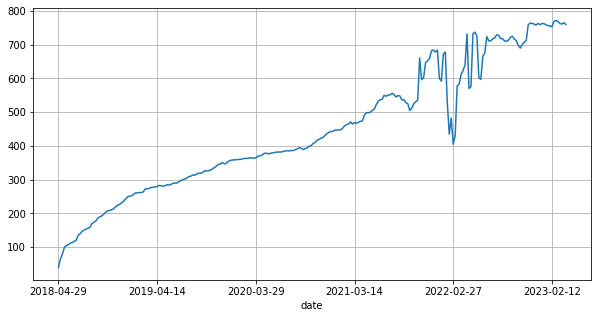

In [ ]:
train_dataset.groupby(train_dataset.index).count().iloc[:,0].plot(figsize = (10,5), grid=True);

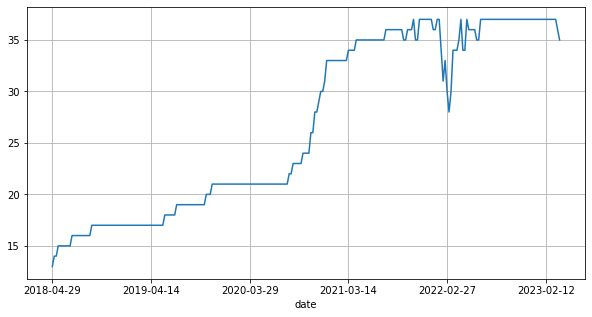

In [ ]:
dydx_subset_df = train_dataset[train_dataset.symbol.isin(dydx_ticker_list)]
dydx_subset_df.groupby(dydx_subset_df.index).count().iloc[:,0].plot(figsize = (10,5), grid=True);

# For MARKET NEUTRAL competition

## We could use simple Linear Regression to train a model and check the Spearman correlation

In [ ]:
from sklearn.linear_model import LinearRegression

reg_market_neutral = LinearRegression(n_jobs=-1).fit(X_train, y_neutral_train)

In [ ]:
# function to calculate Spearman correlation by era (mean, std, max, min)

def spearman_by_era(prediction, target):
    df = pd.DataFrame(index=target.index,
                    data = {'prediction': prediction,
                            'target': target}
                    )
  
    spearman_era_list = []
    for era in df.index.unique():
        era_df = df[df.index == era]
        spearman_corr = sp.stats.spearmanr(era_df.prediction, era_df.target)[0]
        spearman_era_list.append(spearman_corr)

    mean = round(np.mean(spearman_era_list), 4)
    std = round(np.std(spearman_era_list), 4)
    max = round(np.max(spearman_era_list), 4)
    min = round(np.min(spearman_era_list), 4)
    return mean, std, max, min

# function to calculate portfolio return by era (mean, std, max, min)

def calculate_return(symbols, prediction, target):
    df = pd.DataFrame(index=target.index,
                    data = {'symbol': symbols,
                            'prediction': prediction,
                            'target': target}
                    )
    
    dfs = df[df.symbol.isin(dydx_ticker_list)]
    
    return_era_list = []
    for era in dfs.index.unique():
        era_df = dfs[dfs.index == era]
        
        # re-center predictions to it's median to have a market neutral strategy
        predictions = era_df.prediction - era_df.prediction.median()
        
        # compute allocations
        allocations = predictions / sum(abs(predictions))
        
        # compute gain as dot product between allocation and relative deltas
        pct_gain = np.dot(allocations, era_df.target)
        
        return_era_list.append(pct_gain)

    mean = round(np.mean(return_era_list), 4)
    std = round(np.std(return_era_list), 4)
    max = round(np.max(return_era_list), 4)
    min = round(np.min(return_era_list), 4)
    return mean, std, max, min

y_pred_train = reg_market_neutral.predict(X_train)
train_spearman = spearman_by_era(y_pred_train, y_neutral_train)
print('Train dataset Spearman correlation by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(train_spearman[0],
                                                                                             train_spearman[1],
                                                                                             train_spearman[2],
                                                                                             train_spearman[3]))

y_pred_test = reg_market_neutral.predict(X_test)
test_spearman = spearman_by_era(y_pred_test, y_neutral_test)
print('Test dataset Spearman correlation by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(test_spearman[0],
                                                                                             test_spearman[1],
                                                                                             test_spearman[2],
                                                                                             test_spearman[3]))

train_return = calculate_return(symbols_train, y_pred_train, y_neutral_train)
print('Train dataset return by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(train_return[0],
                                                                                 train_return[1],
                                                                                 train_return[2],
                                                                                 train_return[3]))

test_return = calculate_return(symbols_test, y_pred_test, y_neutral_test)
print('Test dataset return by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(test_return[0],
                                                                                 test_return[1],
                                                                                 test_return[2],
                                                                                 test_return[3]))


Train dataset Spearman correlation by era: mean = 0.1763 ; std = 0.0762 ; max = 0.3725 ; min = -0.0774
Test dataset Spearman correlation by era: mean = 0.0967 ; std = 0.0849 ; max = 0.3243 ; min = -0.0745
Train dataset return by era: mean = 0.0255 ; std = 0.1226 ; max = 0.3802 ; min = -0.3387
Test dataset return by era: mean = 0.0105 ; std = 0.0845 ; max = 0.1892 ; min = -0.1497


In [ ]:
# Use the trained Linear Regression model to make prediction on latest data

X_validation = validation_dataset.iloc[:, 1:-2]
y_validation_market_neutral = reg_market_neutral.predict(X_validation)

y_validation_market_neutral[:5]

array([0.49591362, 0.50246538, 0.5812323 , 0.52203814, 0.5633035 ])

## Let's use the prediction from linear regression to join with validation dataset symbol for submission

In [ ]:
prediction_market_neutral = pd.DataFrame()
prediction_market_neutral['symbol'] = list(validation_dataset.symbol)
prediction_market_neutral['prediction'] = y_validation_market_neutral

# sort the prediction to check which symbol is weaker and stronger, ie. FOX is weakest; BTC is strongest
prediction_market_neutral.sort_values('prediction')

,symbol,prediction
138,DAV,0.247644
318,APY,0.258641
433,ERN,0.260695
695,CUBE,0.318956
445,PMGT,0.332527
...,...,...
744,SWM,0.675978
518,BALPHA,0.733247
459,ORME,0.734097
241,CNB,0.737732


## Check is the prediction in accordance for submission format

In [ ]:
#check if y_latest is in accordance to shape for submission
if set(prediction_market_neutral.symbol) == set(validation_dataset.symbol):
    print('symbol matched!')
else:
    print('symbol unmatched, the symbol in prediction df must match the symbol in validation_dataset...')
    
if prediction_market_neutral.shape[1] == 2:
    print('column counts ok!')
else:
    print('It should have 2 columns, first column with symbol, second with prediction...')


symbol matched!
column counts ok!


## Output prediction as a .csv file for submission!

In [ ]:
#Output submission as .csv file which stored in content/prediction folder
import os
if not os.path.exists('/content/prediction'):
    os.makedirs('/content/prediction')
prediction_market_neutral.to_csv('/content/prediction/prediction_market_neutral.csv', index = False, header = None)

# For UPDOWN competition

## For demonstration we could also use Linear Regression to train a model and check the RMSE

In [ ]:
reg_updown = LinearRegression(n_jobs=-1).fit(X_train, y_updown_train)

In [ ]:
# function to calculate RMSE by era (mean, std, max, min)

from sklearn.metrics import mean_squared_error

def rmse_by_era(prediction, target):
    df = pd.DataFrame(index=target.index,
                    data = {'prediction': prediction,
                            'target': target}
                    )
  
    rmse_era_list = []
    for era in df.index.unique():
        era_df = df[df.index == era]
        rmse = mean_squared_error(era_df.prediction, era_df.target, squared=False)
        rmse_era_list.append(rmse)
        
    mean = round(np.mean(rmse_era_list), 4)
    std = round(np.std(rmse_era_list), 4)
    max = round(np.max(rmse_era_list), 4)
    min = round(np.min(rmse_era_list), 4)
    return mean, std, max, min

# function to calculate portfolio return by era (mean, std, max, min)
def calculate_return(symbols, prediction, target):
    df = pd.DataFrame(index=target.index,
                    data = {'symbol': symbols,
                            'prediction': prediction,
                            'target': target}
                    )
    
    dfs = df[df.symbol.isin(dydx_ticker_list)]
    
    return_era_list = []
    for era in dfs.index.unique():
        era_df = dfs[dfs.index == era]
        
        # predictions
        predictions = era_df.prediction
        
        # compute allocations
        allocations = predictions / sum(abs(predictions))
        
        # compute gain as dot product between allocation and relative deltas
        pct_gain = np.dot(allocations, era_df.target)
        
        return_era_list.append(pct_gain)

    mean = round(np.mean(return_era_list), 4)
    std = round(np.std(return_era_list), 4)
    max = round(np.max(return_era_list), 4)
    min = round(np.min(return_era_list), 4)
    return mean, std, max, min

y_pred_train = reg_updown.predict(X_train)
train_rmse_stat = rmse_by_era(y_pred_train, y_updown_train)
print('Train dataset RMSE by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(train_rmse_stat[0],
                                                                             train_rmse_stat[1],
                                                                             train_rmse_stat[2],
                                                                             train_rmse_stat[3]))
y_pred_test = reg_updown.predict(X_test)
test_rmse_stat = rmse_by_era(y_pred_test, y_updown_test)
print('Test dataset RMSE by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(test_rmse_stat[0],
                                                                             test_rmse_stat[1],
                                                                             test_rmse_stat[2],
                                                                             test_rmse_stat[3]))

train_return = calculate_return(symbols_train, y_pred_train, y_updown_train)
print('Train dataset return by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(train_return[0],
                                                                                 train_return[1],
                                                                                 train_return[2],
                                                                                 train_return[3]))

test_return = calculate_return(symbols_test, y_pred_test, y_updown_test)
print('Test dataset return by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(test_return[0],
                                                                                 test_return[1],
                                                                                 test_return[2],
                                                                                 test_return[3]))

In [ ]:
# Use the trained Linear Regression model to make prediction on latest data

X_validation = validation_dataset.iloc[:, 1:-2]
y_validation_updown = reg_updown.predict(X_validation)

y_validation_updown[:5]

## Let's use the prediction from linear regression to join with validation dataset symbol for submission

In [ ]:
prediction_updown = pd.DataFrame()
prediction_updown['symbol'] = list(validation_dataset.symbol)
prediction_updown['prediction'] = y_validation_updown

# sort the prediction to check which symbol is weaker and stronger, ie. FOX is weakest; BTC is strongest
prediction_updown.sort_values('prediction')

## Check is the prediction in accordance for submission format

In [ ]:
#check if y_latest is in accordance to shape for submission
if set(prediction_updown.symbol) == set(validation_dataset.symbol):
    print('symbol matched!')
else:
    print('symbol unmatched, the symbol in prediction df must match the symbol in validation_dataset...')
    
if prediction_updown.shape[1] == 2:
    print('column counts ok!')
else:
    print('It should have 2 columns, first column with symbol, second with prediction...')


## Output prediction as a .csv file for submission!

In [ ]:
#Output submission as .csv file which stored in content/prediction folder
import os
if not os.path.exists('/content/prediction'):
    os.makedirs('/content/prediction')
prediction_updown.to_csv('/content/prediction/prediction_updown.csv', index = False, header = None)